# Plot the triaxiality parameter of the TNG ETG sample
Xiangyu Huang, 2024

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

import pandas as pd
from copy import deepcopy
import os
import matplotlib.colors as colors

In [2]:
working_dir = os.getcwd()

cat100 = pd.read_pickle(working_dir + '/tng_catalog/tng_sigma_shape_cut/tng_100_finite_sigma_shape_cut.pkl')
cat50 = pd.read_pickle(working_dir + '/tng_catalog/tng_sigma_shape_cut/tng_50_finite_sigma_shape_cut.pkl')

zeta_100 = cat100['zeta'].values
xi_100 = cat100['xi'].values

zeta_50 = cat50['zeta'].values
xi_50 = cat50['xi'].values

def triaxiality_param(zeta, xi):
    return (1 - zeta**2) / (1 - xi**2)

Triaxiality_100 = triaxiality_param(zeta_100, xi_100)
Triaxiality_50 = triaxiality_param(zeta_50, xi_50)

/tmp/ipykernel_2583892/1714795122.py:42: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


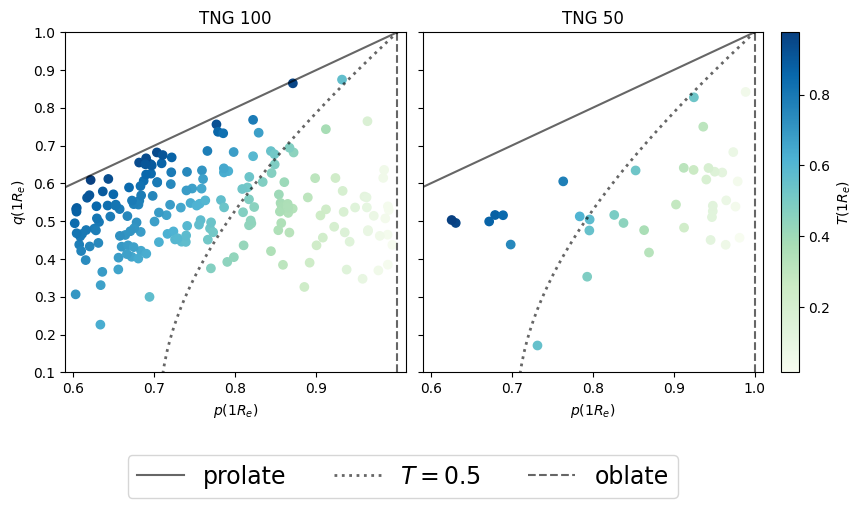

In [3]:
fig= plt.figure(figsize = (9, 5))
gs = fig.add_gridspec(1, 2, wspace = 0.05)
axs = gs.subplots(sharey=1)

cmap = plt.get_cmap('GnBu')

x = np.linspace(np.sqrt(0.5), 1, 200)
x1 = np.linspace(0, 1, 100)
y = np.sqrt(2 * x**2 - 1)

for ax in axs:
    ax.set_box_aspect(1)
    ax.set_xlabel(r'$p(1R_e)$')
    ax.set_ylabel(r'$q(1R_e)$')
    # ax.tick_params(axis='both', labelsize=13)
    ax.plot(x1, x1, marker = ' ', ls = '-', c='k', alpha = 0.6, label = 'prolate', lw=1.5)
    ax.plot(x, y, marker = '', ls = ':', c='k', alpha = 0.6, label = r'$T = 0.5$', lw=2)
    ax.axvline(1.0, marker = ' ', ls = '--', c='k', alpha = 0.6, label = 'oblate', lw = 1.5)
    ax.set_xlim([0.59, 1.01])
    ax.set_ylim([0.1, 1.0])
    ax.label_outer()

cax = fig.add_axes([ax.get_position().x1+0.02,ax.get_position().y0,0.02,ax.get_position().height])
img1 = axs[0].scatter(zeta_100, xi_100, c=Triaxiality_100, cmap=cmap)
img2 = axs[1].scatter(zeta_50, xi_50, c=Triaxiality_50, cmap=cmap)
axs[1].sharey(axs[0])
# axs[1].sharex(axs[0])
fig.colorbar(img1, cax=cax)
cax.set_ylabel(r'$T(1R_e)$')

axs[0].set_xticks(np.arange(0.6, 1, 0.1))

axs[0].set_title('TNG 100')
axs[1].set_title('TNG 50')

dummy_line1, = axs[1].plot([], [], ls = '-', c='k', alpha=0.6, marker = ' ', label = 'prolate', lw = 1.5)
dummy_line2, = axs[1].plot([], [],  marker = '', ls = ':', c='k', alpha = 0.6, label = r'$T = 0.5$', lw = 2)
dummy_line3, = axs[1].plot([], [], marker = ' ', ls = '--', c='k', alpha = 0.6, label = 'oblate', lw = 1.5)
fig.legend(handles= [dummy_line1, dummy_line2, dummy_line3], loc = 'lower center', fontsize = 17, bbox_to_anchor = (0.5, -0.12), ncol=3)

# Adjust layout to prevent overlapping titles
fig.tight_layout()

plt.show()